In [281]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
products_rel_disc=pd.read_csv("./Resources/apple_data.csv")
stocks=pd.read_csv("./Resources/AAPL.csv", parse_dates=['Date'])

date_format1_regex='[a-zA-Z]+\s\d{1,2},\s\d{4}'
products_rel_disc=products_rel_disc[(products_rel_disc['Released'].str.contains(date_format1_regex))]

### Discontinued -> Date, Current, Upcoming 

products_rel_disc

,Released,Model,Family,Discontinued
0,"April 11, 1976",Apple I,Apple I,"September 30, 1977"
1,"June 1, 1977",Apple II,Apple II,"May 1, 1979"
2,"June 1, 1978",Disk II,Drives,"May 1, 1984"
3,"June 1, 1979",Apple II Plus,Apple II series,"December 1, 1982"
4,"June 1, 1979",Apple II EuroPlus,Apple II series,"December 1, 1982"
...,...,...,...,...
666,"September 22, 2023",EarPods (USB-C),Headphones,current
667,"November 1, 2023",Apple Pencil (USB-C),iPad,current
668,"November 7, 2023","iMac (24-inch, M3, 2023)",iMac,current
669,"November 7, 2023","MacBook Pro (M3/M3 Pro/M3 Max) (14-inch, 2023)",MacBook Pro,current


In [282]:
products_rel_disc['Released']=pd.to_datetime(products_rel_disc['Released'], format='%B %d, %Y')

products_rel_disc.head()


,Released,Model,Family,Discontinued
0,1976-04-11,Apple I,Apple I,"September 30, 1977"
1,1977-06-01,Apple II,Apple II,"May 1, 1979"
2,1978-06-01,Disk II,Drives,"May 1, 1984"
3,1979-06-01,Apple II Plus,Apple II series,"December 1, 1982"
4,1979-06-01,Apple II EuroPlus,Apple II series,"December 1, 1982"


In [283]:
products_rel_disc.columns=products_rel_disc.columns.str.strip()
product_stocks=pd.merge(products_rel_disc_2009,stocks, left_on='Released', right_on='Date', how='left')
product_stocks

,Released,Model,Family,Discontinued,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-06,"MacBook Pro (Early 2009) (17"")",MacBook Pro,"June 8, 2009",2009-01-06,3.426786,3.470357,3.299643,3.322143,2.840491,1.289310e+09
1,2009-01-29,MacBook (Early 2009) (White),MacBook,"May 27, 2009",2009-01-29,3.324643,3.369286,3.307143,3.321429,2.839881,5.927292e+08
2,2009-03-03,Mac Mini (Early 2009),Mac Mini,"October 20, 2009",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
3,2009-03-03,iMac (Early 2009),iMac,"October 20, 2009",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
4,2009-03-03,Mac Pro (Early 2009),Mac Pro,"August 9, 2010",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
...,...,...,...,...,...,...,...,...,...,...,...
311,2023-09-22,EarPods (USB-C),Headphones,current,NaT,NaN,NaN,NaN,NaN,NaN,NaN
312,2023-11-01,Apple Pencil (USB-C),iPad,current,NaT,NaN,NaN,NaN,NaN,NaN,NaN
313,2023-11-07,"iMac (24-inch, M3, 2023)",iMac,current,NaT,NaN,NaN,NaN,NaN,NaN,NaN
314,2023-11-07,"MacBook Pro (M3/M3 Pro/M3 Max) (14-inch, 2023)",MacBook Pro,current,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
products_rel_disc_2009=product_stocks[(product_stocks['Released']>'2009-01-01')]
products_rel_disc_2009.dropna(inplace=True)
products_rel_disc_2009.head(34)

,Released,Model,Family,Discontinued,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-06,"MacBook Pro (Early 2009) (17"")",MacBook Pro,"June 8, 2009",2009-01-06,3.426786,3.470357,3.299643,3.322143,2.840491,1.289310e+09
1,2009-01-29,MacBook (Early 2009) (White),MacBook,"May 27, 2009",2009-01-29,3.324643,3.369286,3.307143,3.321429,2.839881,5.927292e+08
2,2009-03-03,Mac Mini (Early 2009),Mac Mini,"October 20, 2009",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
3,2009-03-03,iMac (Early 2009),iMac,"October 20, 2009",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
4,2009-03-03,Mac Pro (Early 2009),Mac Pro,"August 9, 2010",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
5,2009-03-03,Time Capsule (2nd gen) (500 GB),"AirPort, drives","July 30, 2009",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
6,2009-03-03,Time Capsule (2nd gen) (1 TB),"AirPort, drives","March 31, 2010",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
7,2009-03-03,AirPort Extreme 802.11n (3rd gen),AirPort,"October 20, 2009",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
8,2009-03-03,Apple Keyboard (short),Keyboards,"October 20, 2009",2009-03-03,3.176071,3.240714,3.138571,3.156071,2.698497,7.243404e+08
9,2009-03-11,iPod Shuffle (3rd gen) (4 GB),iPod Shuffle,"September 1, 2010",2009-03-11,3.207500,3.359643,3.199286,3.310000,2.830110,8.463728e+08


In [335]:
family_group_2009 = products_rel_disc_2009.groupby(['Family','Released'])

grp_2009_members_count = pd.DataFrame(family_group_2009.size())
grp_2009_members_count.rename(columns={grp_2009_members_count.columns[0]:"Launches"}, inplace=True)
grp_2009_members_count=pd.merge(grp_2009_members_count.reset_index(["Released"]),stocks, left_on='Released', right_on='Date', how='left')
grp_2009_members_count.pop('Date')
grp_2009_members_count.sort_values(['Released'],ascending=True,inplace=True)
grp_2009_members_count

,Released,Launches,Open,High,Low,Close,Adj Close,Volume
75,2009-01-06,1,3.426786,3.470357,3.299643,3.322143,2.840491,1289310400
56,2009-01-29,1,3.324643,3.369286,3.307143,3.321429,2.839881,592729200
0,2009-03-03,1,3.176071,3.240714,3.138571,3.156071,2.698497,724340400
103,2009-03-03,1,3.176071,3.240714,3.138571,3.156071,2.698497,724340400
5,2009-03-03,2,3.176071,3.240714,3.138571,3.156071,2.698497,724340400
...,...,...,...,...,...,...,...,...
101,2021-11-01,1,148.990005,149.699997,147.800003,148.960007,148.335709,74588300
164,2022-03-18,1,160.509995,164.479996,159.759995,163.979996,163.739426,123511700
142,2022-03-18,1,160.509995,164.479996,159.759995,163.979996,163.739426,123511700
55,2022-03-18,1,160.509995,164.479996,159.759995,163.979996,163.739426,123511700


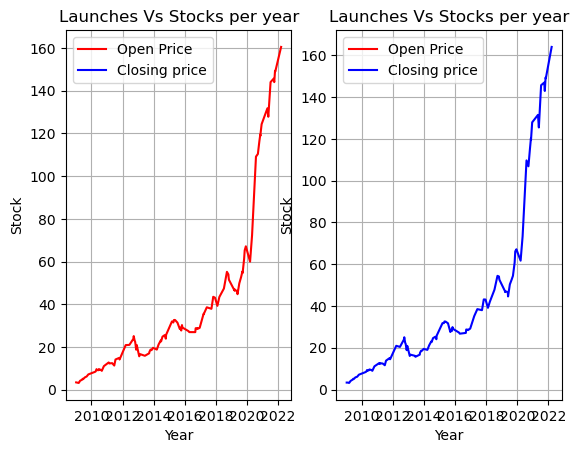

In [360]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
appl_stocks, = plt.plot(grp_2009_members_count['Released'], grp_2009_members_count['Open'], color="red", label="Open Price")
plt.title("Launches Vs Stocks per year")
plt.xlabel("Year")
plt.ylabel("Stock")
plt.legend(handles=[appl_stocks, profit_margin], loc="best")
plt.grid()

plt.subplot(1, 2, 2) # row 2, col 2 index 1
profit_margin, = plt.plot(grp_2009_members_count['Released'], grp_2009_members_count['Close'], color="blue", label="Closing price")
plt.title("Launches Vs Stocks per year")
plt.xlabel("Year")
plt.ylabel("Stock")
plt.legend(handles=[appl_stocks, profit_margin], loc="best")

#plt.xlim(2010,2023)
#plt.ylim(7,40)
plt.grid()
plt.show()

In [285]:
families_date_2009=pd.DataFrame(products_rel_disc_2009.groupby(['Released','Family']).size().reset_index())
families_date_2009.sort_values(['Released'],ascending=True,inplace=True)
families_date_2009.rename(columns={
    families_date_2009.columns[2]:"Count"
    }, inplace=True)

families_date_2009

,Released,Family,Count
0,2009-01-06,MacBook Pro,1
1,2009-01-29,MacBook,1
2,2009-03-03,AirPort,1
3,2009-03-03,"AirPort, drives",2
4,2009-03-03,Keyboards,1
...,...,...,...
201,2023-09-22,Headphones,2
202,2023-09-22,iPhone,4
203,2023-11-01,iPad,1
204,2023-11-07,MacBook Pro,2


In [286]:
plt.hist(Count
    
    #families_date_2009.plot.bar(x='Released',y='Count')


#plt.plot(kind="bar",x=families_date_2009['Released'],y=families_date_2009['Count'])
#plt.title('Lunches producs (2009-Courent)')

SyntaxError: incomplete input (1055280335.py, line 7)

In [ ]:
families2009=pd.DataFrame(products_rel_disc_2009.groupby('Family').size())
families2009.rename(columns={
    families2009.columns[0]:"Count"
    
}, inplace=True)
families2009.sort_values(['Count'],ascending=True,inplace=True)
families2009

In [ ]:
families2009.plot.bar()
plt.title('Number of products per family (2009-Courent)')